## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten
# Datenanalyse der begleitenden Lehrendenbefragung 2017/18

#### Daten importieren

In [1]:
import pandas as pd
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten1 = pd.read_excel('D:\Daten\DISS\Daten\Estrategias_Profesores_Kienberger_P2017_int.xlsx', encoding='utf-16')

In [3]:
Daten2 = pd.read_excel('D:\Daten\DISS\Daten\Estrategias_Profesores_Kienberger_2018_ber.xlsx',encoding='utf-16')

In [4]:
Daten2.index = [10 + i for i in Daten2.index]

In [5]:
Daten = pd.concat([Daten1, Daten2], axis=0, join='outer', sort=True)

In [6]:
Daten1.shape

(10, 129)

In [7]:
Daten2.shape

(47, 127)

In [8]:
Daten.shape

(57, 130)

In [85]:
Daten = Daten.fillna(0)

In [87]:
Daten.to_excel('D:\Daten\DISS\Daten\Estrategias_Profesores_Kienberger_2018_ges.xlsx',encoding='utf-16')

#### Glossar erstellen

Datei aufrufen, die in einem anderem Notebook erstellt und gespeichert wurde

In [10]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\GlossProf2018')

Funktion, um Index (Name) einer Bezeichnung im Glossar zu finden:

In [11]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

Funktion, um Bezeichnung von Index im Glossar zu finden:

In [12]:
def get_name_glossind(word):
    for i, val in enumerate(gloss.index):
        if word.lower() in str(val).lower():
            return i, gloss.loc[val][0]

In [13]:
#??get_name_gloss('A-Q1')

#### Untergruppen und Listen für die Analyse

In [14]:
Liste_A_Q1 = [col for col in Daten.columns if 'A-Q1' in col]
Liste_A_Q1.pop(9)

'A-Q1a'

In [15]:
Liste_B_Q1 = [col for col in Daten.columns if 'B-Q1' in col]
Liste_B_Q1.pop(len(Liste_B_Q1)-1)
Liste_B_Q1 = [el for el in Liste_B_Q1 if 'TEXT' not in el]

In [16]:
Liste_B_Q2 = [col for col in Daten.columns if 'B-Q2' in col]
Liste_B_Q2.pop(7)

'B-Q2a'

In [17]:
Liste_B_Q3 = [col for col in Daten.columns if 'B-Q3' in col]
Liste_B_Q3.pop(8)

'B-Q3a'

In [18]:
Liste_C_Q1 = [col for col in Daten.columns if 'C-Q1' in col]
Liste_C_Q1.pop(10)

'C-Q1a'

##### Visualisierung

Funktion für Grafiken:

In [19]:
def graf_hist(D,l,sx,sy,nrow,ncol):
    fig = plt.figure(figsize=(sx,sy))
    for i, col in enumerate(l):
        plt.subplot(nrow,ncol,i+1)
        plt.hist(D[col].dropna(),color = '#0063A6')
        plt.xticks([1,2,3,4,5])
        plt.title(col,size=13)
    plt.show()

##### Korrelation

Funktion, um Daten mit bestimmtem Korrelationswert (z.B. über 0,5) zu erhalten:

In [20]:
def get_max_corr(df,col,lim = 0.5):
    return df[(df[col] > lim) & (df[col].dropna() < 0.99)][col]

### Cronbach's Alpha berechnen

In [21]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    calpha = nitems / float(nitems-1) * (1 - itemvars.sum() / float(tscores.var(ddof=1)))

    return calpha

In [22]:
CronbachAlpha(Daten[Liste_A_Q1])

0.5524190574526145

In [23]:
CronbachAlpha(Daten[Liste_B_Q2])

0.7637261443086888

In [24]:
CronbachAlpha(Daten[Liste_B_Q3])

0.7620476726391444

In [25]:
CronbachAlpha(Daten[Liste_C_Q1])

0.5982037464716448

In [26]:
Liste_AB = Liste_A_Q1 + Liste_B_Q2 + Liste_B_Q3

In [27]:
Liste_ABC = Liste_AB + Liste_C_Q1

In [28]:
CronbachAlpha(Daten[Liste_ABC])

0.8659823433115793

### Zeitanalyse

In [29]:
Dur = Daten['Duration (in seconds)']

In [30]:
Dur = pd.to_numeric(Daten['Duration (in seconds)'])

In [31]:
Dur.describe()

count        57.00000
mean       8338.54386
std       46396.52077
min         377.00000
25%         597.00000
50%         854.00000
75%        1053.00000
max      345611.00000
Name: Duration (in seconds), dtype: float64

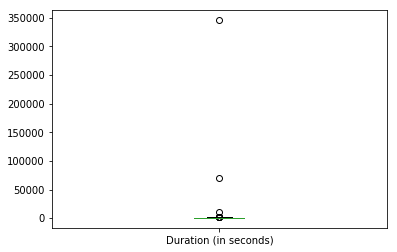

In [32]:
Dur.plot.box()

Überblick über die Beantwortungszeit und Darstellung in einem Boxplot, um Outlyers zu erkennen -> sollen nicht mit berücksichtigt werden (z.B. TN, die an einem Tag begonnen und später beendet haben...)

sinnvoll ist, eine Grenze bei ca. einer Stunde Beantwortungszeit (3600 sek) festzulegen

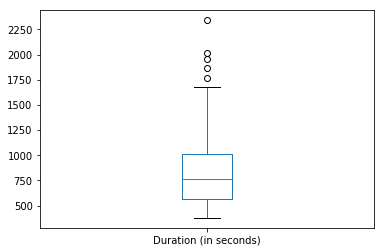

In [33]:
Dur[Dur < 4000].plot.box()

In [34]:
Dur[Dur < 4000].describe()

count      54.000000
mean      896.203704
std       454.417412
min       377.000000
25%       564.000000
50%       761.000000
75%      1014.500000
max      2341.000000
Name: Duration (in seconds), dtype: float64

In [35]:
(Dur[Dur < 4000].mean())/60

14.936728395061728

Schlussfolgerung:

Die durchschnittliche Beantwortungszeit liegt bei ca. 15min, wobei große Unterschiede zwischen den TN beobachtet werden können.

### Analyse der Angaben zur Strategiennutzung der Lernenden

In [36]:
Daten[Daten[Liste_A_Q1] != 0][Liste_A_Q1].describe()

,A-Q1_1,A-Q1_2,A-Q1_3,A-Q1_4,A-Q1_5,A-Q1_6,A-Q1_7,A-Q1_8,A-Q1_9
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,56.000000,56.000000,55.000000
mean,2.912281,3.280702,3.245614,3.122807,3.912281,3.596491,4.232143,3.607143,3.745455
std,1.106486,0.674918,0.762531,0.825274,0.931219,1.099670,0.713279,1.021204,1.057919
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


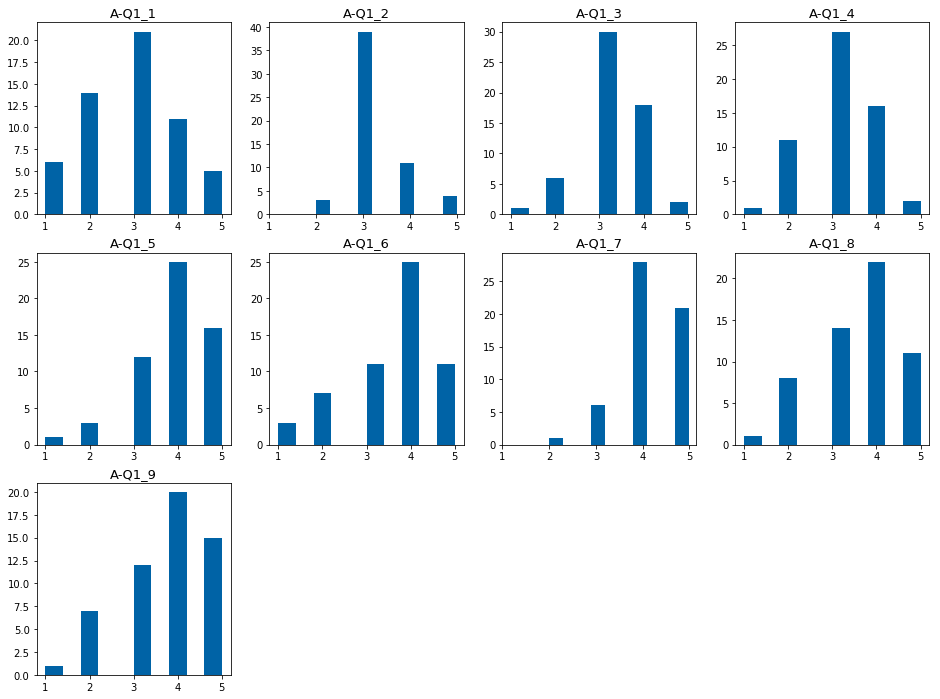

In [37]:
graf_hist(Daten[Daten[Liste_A_Q1] != 0],Liste_A_Q1,16,12,3,4)

1
Los estudiantes descubren el significado o la función de palabras nuevas en alemán gracias a su lengua materna.

2
Los estudiantes comprenden palabras nuevas en alemán con la ayuda de otras lenguas.

3
Los estudiantes utilizan sus conocimientos de alemán, p. ej. otras palabras conocidas, las partes de la oración o la formación de palabras compuestas.

4
Los estudiantes utilizan información extraída del contexto, p. ej. la posición de una palabra en la frase o el formato del texto.

5
Los estudiantes le piden ayuda a usted o a otro/a profesor/a.

6
Los estudiantes piden ayuda a sus compañeros/as de clase.

7
Los estudiantes consultan un diccionario u otra fuente (en papel o digital).

8
Detecto claras diferencias individuales entre los estudiantes en cuanto al uso de las estrategias.

9
Detecto claras diferencias en el uso de las estrategias entre los distintos grupos de estudiantes, p. ej. principiantes - avanzados. 

Korrelation in A-Q1:

In [38]:
Korr_A_Q1 = Daten[Liste_A_Q1].corr(method = 'spearman')
Korr_A_Q1

,A-Q1_1,A-Q1_2,A-Q1_3,A-Q1_4,A-Q1_5,A-Q1_6,A-Q1_7,A-Q1_8,A-Q1_9
A-Q1_1,1.000000,0.061026,0.133568,0.112598,0.238019,0.181021,-0.045611,-0.166188,-0.096314
A-Q1_2,0.061026,1.000000,0.258053,0.330217,0.446363,0.040218,0.174102,0.050909,0.081795
A-Q1_3,0.133568,0.258053,1.000000,0.480294,0.183095,0.065099,-0.070927,0.198303,0.192205
A-Q1_4,0.112598,0.330217,0.480294,1.000000,0.151274,-0.146442,-0.170321,0.163822,0.249874
A-Q1_5,0.238019,0.446363,0.183095,0.151274,1.000000,0.326999,0.187362,-0.065321,0.143310
A-Q1_6,0.181021,0.040218,0.065099,-0.146442,0.326999,1.000000,-0.040420,0.053246,0.105193
A-Q1_7,-0.045611,0.174102,-0.070927,-0.170321,0.187362,-0.040420,1.000000,-0.086684,0.090811
A-Q1_8,-0.166188,0.050909,0.198303,0.163822,-0.065321,0.053246,-0.086684,1.000000,0.471077
A-Q1_9,-0.096314,0.081795,0.192205,0.249874,0.143310,0.105193,0.090811,0.471077,1.000000


In [39]:
for col in Liste_A_Q1:
    print(get_max_corr(Korr_A_Q1,col,0.5))

Series([], Name: A-Q1_1, dtype: float64)
Series([], Name: A-Q1_2, dtype: float64)
Series([], Name: A-Q1_3, dtype: float64)
Series([], Name: A-Q1_4, dtype: float64)
Series([], Name: A-Q1_5, dtype: float64)
Series([], Name: A-Q1_6, dtype: float64)
Series([], Name: A-Q1_7, dtype: float64)
Series([], Name: A-Q1_8, dtype: float64)
Series([], Name: A-Q1_9, dtype: float64)


### Erschließungsstrategien im Unterricht

#### B-Q1 (32 Einzelstrategien)

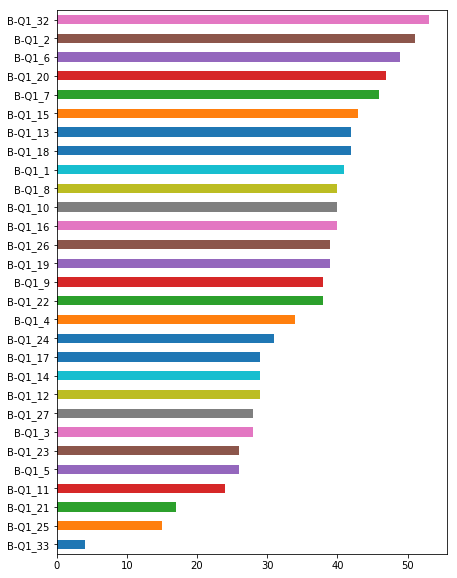

In [40]:
Daten[Liste_B_Q1].sum(axis=0).sort_values(ascending=True).plot(kind='barh', figsize=(7,10));

In [56]:
Daten[Liste_B_Q1].sum(axis=0).sort_values(ascending=False)

B-Q1_32    53
B-Q1_2     51
B-Q1_6     49
B-Q1_20    47
B-Q1_7     46
B-Q1_15    43
B-Q1_13    42
B-Q1_18    42
B-Q1_1     41
B-Q1_8     40
B-Q1_10    40
B-Q1_16    40
B-Q1_26    39
B-Q1_19    39
B-Q1_9     38
B-Q1_22    38
B-Q1_4     34
B-Q1_24    31
B-Q1_17    29
B-Q1_14    29
B-Q1_12    29
B-Q1_27    28
B-Q1_3     28
B-Q1_23    26
B-Q1_5     26
B-Q1_11    24
B-Q1_21    17
B-Q1_25    15
B-Q1_33     4
dtype: int64

- (1) Unbekannte deutsche Wörter mit gleich oder ähnlich geschriebenen Wörtern in der Muttersprache vergleichen
- (2) Unbekannte deutsche Wörter mit gleich oder ähnlich geschriebenen Wörtern in Englisch vergleichen (z.B. dt. Licht - engl. light)
- (3) Unbekannte deutsche Wörter mit gleich oder ähnlich geschriebenen Wörtern in anderen Sprachen vergleichen. Optional: Wenn Sie eine oder mehrere bestimmte Sprachen dafür empfehlen, können Sie sie hier angeben:
- (32) Kenntnisse von Internationalismen nutzen (z.B. Akademie, Kaffee, Transport)
- (4) Klangbild aktivieren, z.B. durch leises Vorsprechen oder Vorstellen des Klanges, um ähnlich klingende Wörter in der Muttersprache oder einer anderen Sprache zu finden (z.B. dt. Haus - engl. house)
- (5) Kenntnisse über Lautentsprechungen zwischen Deutsch und anderen (germanischen) Sprachen und/oder über die historische Entwicklung der deutschen Sprache nutzen (z.B. engl. d - dt. t: day - Tag, p – f: hope – hoffen, ship - Schiff)
- (6) Wissen über die Wortbildungsregeln des Deutschen nutzen (z.B. Kompositabildung, typische Endungen für bestimmte Wortarten)
- (7) Aus Teilbedeutung zusammengesetzter Wörter (z.B. Stamm, Prä- und Suffixe, Teile von Komposita) auf die Gesamtbedeutung schließen
- (8) Wissen über Bestandteile von Wörtern, die grammatische Funktionen anzeigen, nutzen (z.B. Pluraloder Kasusmarkierungen für Substantive, typische Endungen von Verben in verschiedenen Zeitformen/Tempora etc.)
- (9) Wissen über orthografische Regeln des Deutschen nutzen (z.B. Großschreibung der Substantive, Bindestriche in zusammengesetzten Wörtern, Punkt oder Komma als Strukturierungshilfen etc.)
- (10) Wissen über die Satzstellung im Deutschen nutzen (z.B. Personalform des Verbes an zweiter Position im Satz, Verbal/Satzklammer etc.)
- (11) Den grammatikalischen Aufbau von (Teil-)Sätzen analysieren, um Verbindungen zwischen bekannten und unbekannten Wörtern zu finden
- (12) Die semantischen Beziehungen zwischen bekannten und unbekannten Wörtern analysieren
- (13) Systematische lexikalische Beziehungen wie Synonyme, Antonyme, Reihungen, Über- und Unterbegriffe beachten
- (14) Verwendung von Konnektoren und anderen Mitteln der Textverbindung wie Pronomen, Adverbien etc. beachten
- (15) Erklärungshilfen im Text wie Paraphrasen, Definitionen, Erklärungen, Beispiele etc., die das unbekannte Wort umschreiben oder erklären, nutzen
- (16) Logische Zusammenhänge im Text nutzen (z.B. Ursache – Wirkung, vorher – nachher etc.)
- (17) Textsortenwissen nutzen
- (18) Wissen über das im Text behandelte Thema nutzen
- (19) Kulturspezifisches und landeskundliches Wissen nutzen (z.B. Namen berühmter Persönlichkeiten, geographische oder politische Informationen)
- (20) Gesunden Menschenverstand und allgemeines Weltwissen nutzen
- (21) Format und visuelle Textgestalt beachten (z.B. Layout, Schriftart und -größe, Hervorhebungen etc.)
- (22) Bilder, Grafiken, Diagramme, audiovisuelle Elemente (auf Internetseiten) etc. nutzen
- (23) Zahlen oder andere verständliche Zeichen nutzen
- (24) Wissen über die Kommunikationssituation oder den Kontext der Veröffentlichung nutzen (z.B. Ort, Zeit, Situation, in der ein Text gefunden wurde)
- (25) Hyperlinks beim Erschließen von unbekannten Wörtern in Texten im Internet nutzen
- (26) Verschiedene Strategien kombinieren, um die Erschließung unbekannter Wörter abzusichern
- (27) Erschließungsstrategien situationsabhängig einsetzen, z.B. nach Textsorte oder Schwierigkeitsgrad der Texte
- (33) Andere:
- (34) Keine

#### B-Q2 (Methoden)

In [41]:
Daten[Daten[Liste_B_Q2] != 0][Liste_B_Q2].describe()

,B-Q2_1,B-Q2_2,B-Q2_3,B-Q2_4,B-Q2_5,B-Q2_6,B-Q2_8
count,56.000000,57.000000,57.000000,57.000000,57.00000,57.000000,57.000000
mean,3.428571,3.140351,3.596491,2.859649,2.54386,3.140351,3.210526
std,1.024378,1.355394,1.131681,1.245543,1.16604,1.140780,1.346117
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,2.000000,2.00000,3.000000,2.000000
50%,3.000000,3.000000,4.000000,3.000000,2.00000,3.000000,3.000000
75%,4.000000,4.000000,5.000000,4.000000,3.00000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000


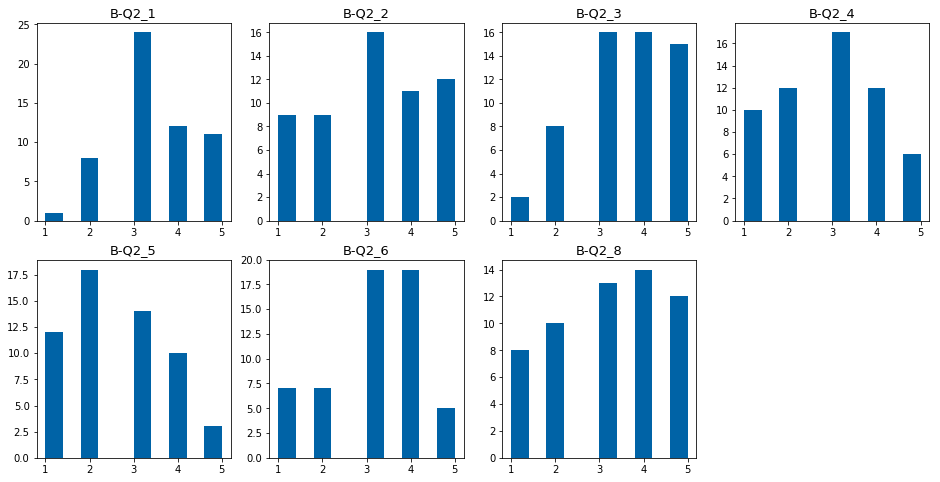

In [42]:
graf_hist(Daten[Daten[Liste_B_Q2] != 0],Liste_B_Q2,16,8,2,4)

In [57]:
Daten[Liste_B_Q2].mean().sort_values(ascending = False)

B-Q2_3    3.596491
B-Q2_1    3.368421
B-Q2_8    3.210526
B-Q2_6    3.140351
B-Q2_2    3.140351
B-Q2_4    2.859649
B-Q2_5    2.543860
dtype: float64

1
Estas estrategias se presentan (y explican) en clase.

2
Los estudiantes reciben consejos sobre cómo familiarizarse de manera autónoma con estas estrategias, p. ej. mediante páginas web, libros u otros materiales sobre estrategias de aprendizaje. 

3
Estas estrategias se explican y se practican con ejemplos conretos, realizando tareas, p. ej. leyendo un texto difícil.

8
Se pregunta a los estudiantes sobre sus conocimientos previos, p. ej. qué estrategias conocen y/o saben utilizar. 

4
Se prueban y se comparan diferentes estrategias.

5
Se reflexiona sobre el uso de estas estrategias, p. ej. sobre qué estrategia sería adecuada en una situación y/o para una persona determinada.

6
Los estudiantes adquieren estas estrategias de manera inconsciente durante las clases, p. ej. mientras leen textos difíciles, sin que se requiera una explicación o indicación específica.

Korrelation in B-Q2:

In [43]:
Korr_B_Q2 = Daten[Liste_B_Q2].corr(method = 'spearman')
Korr_B_Q2

,B-Q2_1,B-Q2_2,B-Q2_3,B-Q2_4,B-Q2_5,B-Q2_6,B-Q2_8
B-Q2_1,1.000000,0.311883,0.510349,0.460143,0.436681,-0.179549,0.342957
B-Q2_2,0.311883,1.000000,0.423075,0.506595,0.560977,-0.116062,0.425525
B-Q2_3,0.510349,0.423075,1.000000,0.494464,0.454988,-0.156597,0.349275
B-Q2_4,0.460143,0.506595,0.494464,1.000000,0.722663,-0.099747,0.600651
B-Q2_5,0.436681,0.560977,0.454988,0.722663,1.000000,-0.089832,0.530554
B-Q2_6,-0.179549,-0.116062,-0.156597,-0.099747,-0.089832,1.000000,0.071078
B-Q2_8,0.342957,0.425525,0.349275,0.600651,0.530554,0.071078,1.000000


In [44]:
for col in Liste_B_Q2:
    print(get_max_corr(Korr_B_Q2,col,0.6))

Series([], Name: B-Q2_1, dtype: float64)
Series([], Name: B-Q2_2, dtype: float64)
Series([], Name: B-Q2_3, dtype: float64)
B-Q2_5    0.722663
B-Q2_8    0.600651
Name: B-Q2_4, dtype: float64
B-Q2_4    0.722663
Name: B-Q2_5, dtype: float64
Series([], Name: B-Q2_6, dtype: float64)
B-Q2_4    0.600651
Name: B-Q2_8, dtype: float64


#### B-Q3 (Quellen und Material)

In [45]:
Daten[Daten[Liste_B_Q3] != 0][Liste_B_Q3].describe()

,B-Q3_1,B-Q3_2,B-Q3_3,B-Q3_4,B-Q3_5,B-Q3_6,B-Q3_7,B-Q3_8
count,57.000000,55.000000,56.000000,57.000000,51.000000,54.000000,56.000000,55.000000
mean,2.578947,2.636364,2.660714,2.964912,2.901961,2.277778,2.821429,2.763636
std,1.164158,1.324465,1.391883,1.133341,1.253075,1.337650,1.322630,1.490260
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000
75%,3.000000,3.500000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [46]:
Daten[Daten[Liste_B_Q3] != 0][Liste_B_Q3].mean().sort_values(ascending = False)

B-Q3_4    2.964912
B-Q3_5    2.901961
B-Q3_7    2.821429
B-Q3_8    2.763636
B-Q3_3    2.660714
B-Q3_2    2.636364
B-Q3_1    2.578947
B-Q3_6    2.277778
dtype: float64

In [47]:
for col in Liste_B_Q3:
    print(Daten[Daten[col] >= 3].shape[0])

29
27
27
38
31
19
30
30


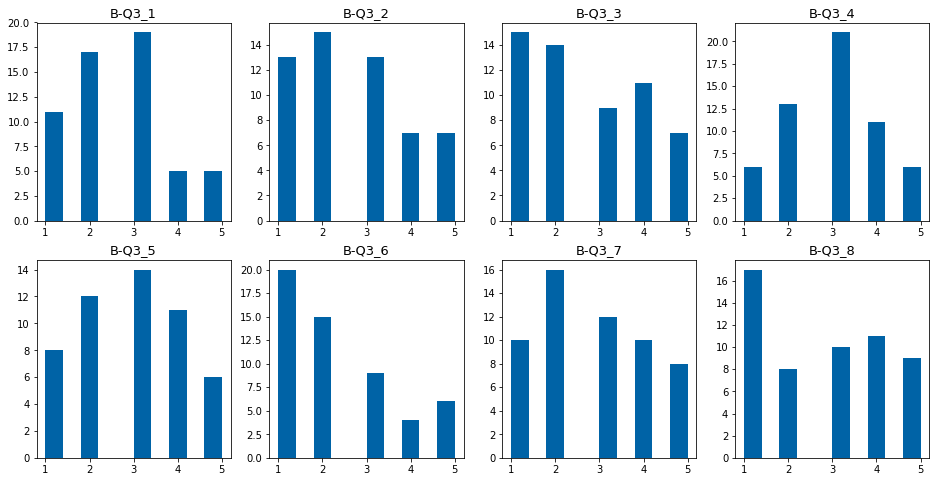

In [48]:
graf_hist(Daten[Daten[Liste_B_Q3] != 0],Liste_B_Q3,16,8,2,4)

1
Estas estrategias se trataron durante mis estudios.

2
Estas estrategias se trataron durante mi formación como docente.

3
Estas estrategias se trataron en cursos de formación continua de profesorado.

4
En los libros de texto que utilizo se tratan estas estrategias. 

5
En los manuales del profesor que utilizo se tratan estas estrategias. 

6
Utilizo páginas web o blogs que tratan estas estrategias.

7
Utilizo libros, revistas u otros materiales didácticos que tratan estas estrategias.

8
He desarrollado material propio para la enseñanza de estas estrategias.

### Einstellung zu Erschließungsstrategien

#### C-Q1

In [58]:
Daten[Liste_C_Q1].describe()

,C-Q1_1,C-Q1_10,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7,C-Q1_8,C-Q1_9
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,3.614035,4.578947,3.964912,3.736842,3.842105,2.175439,3.192982,4.596491,4.526316,2.982456
std,1.221158,0.680004,0.822993,1.044139,1.065523,1.037215,1.231123,0.529813,0.629775,1.125853
min,0.000000,2.000000,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,3.000000,0.000000
25%,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,2.000000
50%,4.000000,5.000000,4.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


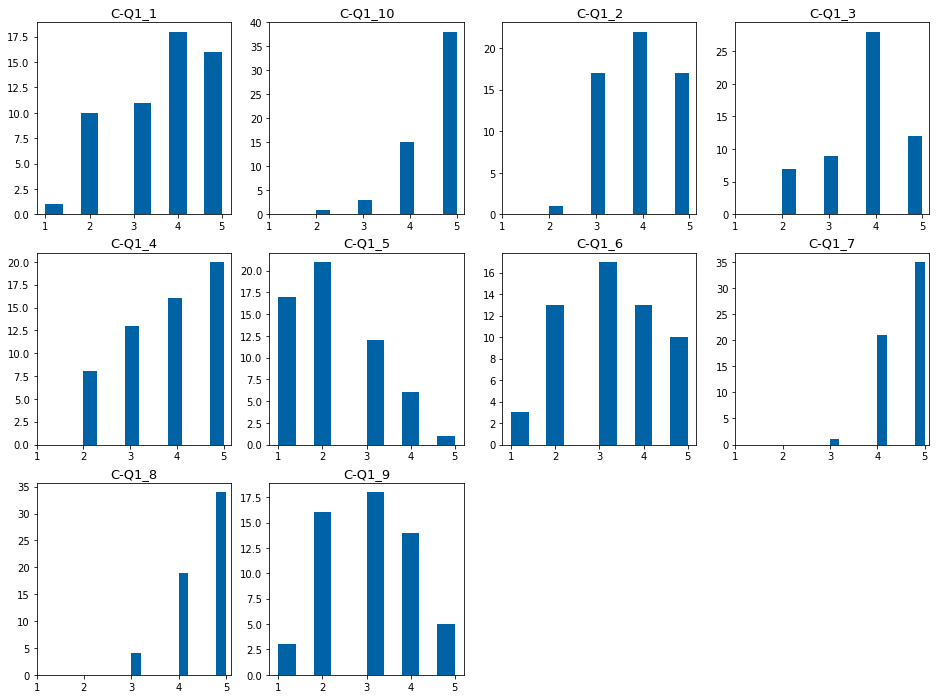

In [59]:
graf_hist(Daten[Daten[Liste_C_Q1] != 0],Liste_C_Q1,16,12,3,4)

1
Estas estrategias son un tema importante en mis clases de alemán.  

2
Tratar estas estrategias es especialmente importante en niveles inferiores.

3
Tratar estas estrategias es especialmente importante en niveles intermedios.

4
Tratar estas estrategias es especialmente importante en niveles avanzados.

5
No hace falta enseñar estas estrategias de forma explícita, ya que los estudiantes las usan en cualquier caso de forma inconsciente.

6
En mis clases se trabaja con textos complejos que requieren el uso de estrategias para descubrir palabras desconocidas por parte de los estudiantes.

7
Estas estrategias son útiles para ampliar el vocabulario.

8
Estas estrategias son útiles para mejorar la comprensión lectora.

9
Utilizo material adaptado al nivel de mis estudiantes para que lo entiendan sin tener que utilizar estrategias de inferencia complicadas.

10
Fomentando el uso de estas estrategias se favorece el aprendizaje autónomo.

Korrelation in C-Q1:

In [60]:
Korr_C_Q1 = Daten[Liste_C_Q1].corr(method = 'spearman')
Korr_C_Q1

,C-Q1_1,C-Q1_10,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7,C-Q1_8,C-Q1_9
C-Q1_1,1.000000,0.139704,0.370078,0.438305,0.283825,-0.114409,0.495790,0.297806,0.427121,0.209627
C-Q1_10,0.139704,1.000000,0.109117,0.166947,0.198803,-0.142845,0.085043,0.453772,0.432972,-0.206947
C-Q1_2,0.370078,0.109117,1.000000,0.237616,0.020683,-0.423893,0.185873,0.197456,0.115880,-0.142184
C-Q1_3,0.438305,0.166947,0.237616,1.000000,0.730716,-0.221967,0.231967,0.213705,0.125672,0.201489
C-Q1_4,0.283825,0.198803,0.020683,0.730716,1.000000,-0.193030,0.073449,0.253557,0.013023,0.319685
C-Q1_5,-0.114409,-0.142845,-0.423893,-0.221967,-0.193030,1.000000,-0.095771,-0.067486,-0.130543,0.041614
C-Q1_6,0.495790,0.085043,0.185873,0.231967,0.073449,-0.095771,1.000000,0.186296,0.208407,0.117523
C-Q1_7,0.297806,0.453772,0.197456,0.213705,0.253557,-0.067486,0.186296,1.000000,0.419800,-0.034429
C-Q1_8,0.427121,0.432972,0.115880,0.125672,0.013023,-0.130543,0.208407,0.419800,1.000000,0.004361
C-Q1_9,0.209627,-0.206947,-0.142184,0.201489,0.319685,0.041614,0.117523,-0.034429,0.004361,1.000000


In [61]:
for col in Liste_C_Q1:
    print(get_max_corr(Korr_C_Q1,col,0.5))

Series([], Name: C-Q1_1, dtype: float64)
Series([], Name: C-Q1_10, dtype: float64)
Series([], Name: C-Q1_2, dtype: float64)
C-Q1_4    0.730716
Name: C-Q1_3, dtype: float64
C-Q1_3    0.730716
Name: C-Q1_4, dtype: float64
Series([], Name: C-Q1_5, dtype: float64)
Series([], Name: C-Q1_6, dtype: float64)
Series([], Name: C-Q1_7, dtype: float64)
Series([], Name: C-Q1_8, dtype: float64)
Series([], Name: C-Q1_9, dtype: float64)


### Charakteristika der Stichprobe

In [91]:
Finished = Daten[:]

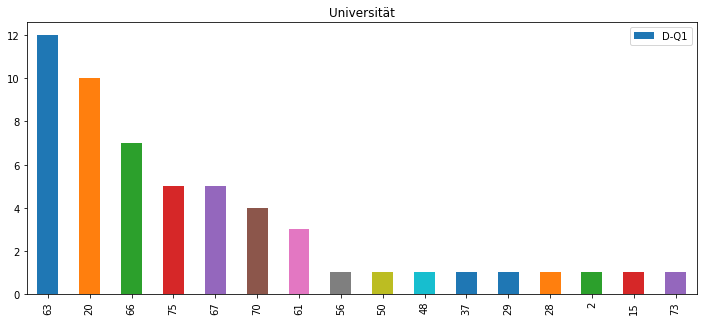

In [64]:
Finished[Finished['D-Q1'] != 0]['D-Q1'].value_counts().plot(kind='bar', 
                                                            figsize = (12,5), width = 0.5, 
                                                            legend = True, title = "Universität");

(1)	Abat Oliba-CEU
(2)	Alcalá de Henares
(3)	Alfonso X El Sabio
(4)	Alicante
(5)	Almería
(6)	Antonio de Nebrija
(7)	Autónoma de Barcelona
(8)	Autónoma de Madrid
(9)	Barcelona
(10)	Burgos
(11)	Cádiz
(12)	Camilo José Cela
(13)	Cantabria
(14)	Cardenal Herrera-CEU
(15)	Carlos III
(16)	Castilla-La Mancha
(17)	Católica de Ávila
(18)	Católica de Valencia
(19)	Católica S. Antonio de Murcia
(20)	Complutense de Madrid
(21)	Córdoba
(22)	Coruña, A
(23)	Deusto
(24)	Europea de Madrid
(25)	Europea Miguel de Cervantes
(26)	Extremadura
(27)	Francisco de Vitoria
(28)	Girona
(29)	Granada
(30)	Huelva
(31)	IE Universidad
(32)	Illes Balears
(33)	Internacional de Catalunya
(34)	Internacional de La Rioja
(35)	Internacional Valenciana
(36)	Jaén
(37)	Jaume I de Castellón
(38)	La Laguna
(39)	La Rioja
(40)	León
(41)	Lleida
(42)	Málaga
(43)	Miguel Hernández de Elche
(44)	Mondragón
(45)	Murcia
(46)	Navarra
(47)	Oberta de Catalunya
(48)	Oviedo
(49)	Pablo de Olavide
(50)	País Vasco
(51)	Palmas (Las)
(52)	Politécnica de Cartagena
(53)	Politécnica de Cataluña
(54)	Politécnica de Madrid
(55)	Politécnica de Valencia
(56)	Pompeu Fabra
(57)	Pontificia Comillas
(58)	Pontificia de Salamanca
(59)	Pública de Navarra
(60)	Ramón Llull
(61)	Rey Juan Carlos
(62)	Rovira i Virgili
(63)	Salamanca
(64)	San Jorge
(65)	San Pablo-CEU
(66)	Santiago de Compostela
(67)	Sevilla
(68)	U.N.E.D.
(69)	UDIMA
(70)	Valencia (Est. General)
(71)	Valladolid
(72)	Vic
(73)	Vigo
(74)	Zaragoza
(75)	Otra

In [65]:
Finished['D-Q1'].value_counts()

63    12
20    10
66     7
75     5
67     5
70     4
61     3
0      2
56     1
50     1
48     1
37     1
29     1
28     1
2      1
15     1
73     1
Name: D-Q1, dtype: int64

In [66]:
Finished['D-Q1'].nunique()

17

In [67]:
Finished['D-Q1a'].value_counts()

0                                           52
ESCUELA OFICIAL DE IDIOMAS                   1
EOI                                          1
Enseñanza Media.IES JM Llompart de Palma     1
Universidad Pablo de Olavide Sevilla         1
BOLZANO                                      1
Name: D-Q1a, dtype: int64

Lehrende aus 15 verschiedenen Universitäten nahmen an der Befragung teil.

In [72]:
As_cols = [col for col in Finished.columns if 'D-Q2' in col]
As_cols.pop(len(As_cols)-1)
As_cols.pop(len(As_cols)-1)

'D-Q2a'

In [97]:
Finished[As_cols].astype(integer).sum()

D-Q2_1    24
D-Q2_2    12
D-Q2_3     7
D-Q2_4    10
D-Q2_5     1
D-Q2_7     8
D-Q2_8     7
D-Q2_9    14
dtype: int64

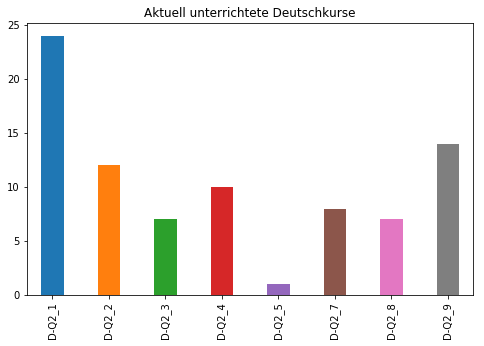

In [100]:
Finished[As_cols].astype(integer).sum().plot(kind = 'bar', figsize = (8,5), width = 0.4, title = "Aktuell unterrichtete Deutschkurse");

- (1)	Asignatura en Estudios Alemanes / Filología Alemana 
- (2)	Asignatura para otras Filologías
- (3)	Asignatura en Traducción, Alemán 1a Lengua Extranjera / B
- (4)	Asignatura en Traducción, Alemán 2a Lengua Extranjera / C
- (5)	Asignatura en Humanidades
- (6)	Asignatura en Economía
- (7)	Asignatura en Turismo
- (8)	Otro curso de alemán que forma parte de una carrera universitaria
- (9)	Otro curso de alemán en la universidad

In [102]:
Finished['D-Q2b'].value_counts()

0                                                                                  52
Llengües Aplicades                                                                  1
Aleman B-1                                                                          1
Landeskundekurse D-A-CH                                                             1
Aus Beobachtungen der Dozenten der Complutense                                      1
Zusatzkurse zur Vertiefung der in den Regelsprachkursen thematisierten Inhalten     1
Name: D-Q2b, dtype: int64

In [103]:
Niv_cols = [col for col in Finished.columns if 'D-Q3' in col]
Niv_cols.pop(len(Niv_cols)-1)

'D-Q3a'

In [104]:
Finished[Niv_cols].astype(integer).sum()

D-Q3_1    34
D-Q3_2    38
D-Q3_3    33
D-Q3_4    22
D-Q3_5    10
dtype: int64

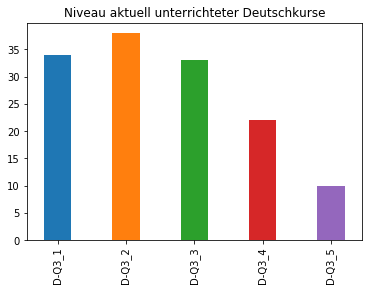

In [107]:
Finished[Niv_cols].astype(integer).sum().plot(kind = 'bar', figsize = (6,4), width = 0.4, title = "Niveau aktuell unterrichteter Deutschkurse");

(1)	A1, 
(2)	A2, 
(3)	B1, 
(4)	B2, 
(5)	C1,
(6)	C2 

In [ ]:
Finished['D-Q4'].value_counts()

In [ ]:
Finished[Finished['D-Q5'] != 0]['D-Q5'].describe()

In [ ]:
Finished[Finished['D-Q5'] != 0]['D-Q5'].astype(integer).value_counts().sort_index().plot(kind='bar', figsize = (15,5), legend = True, title = "Alter");

In [ ]:
Finished['D-Q6'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Geschlecht");

In [ ]:
Finished['D-Q6'].value_counts()

In [ ]:
Finished[Finished['D-Q7'] != 0]['D-Q7'].value_counts().plot(kind='bar', figsize = (10,5), legend = True, title = "Erstsprachen (1)");

(1) 	Castellano
(2) 	Catalán (Català), Valenciano (Valencià)
(3) 	Gallego (Galego)
(4) 	Vasco (Euskara)
(5) 	Alemán (Deutsch)
(6) 	Árabe (العربية)
(7) 	Chino mandarín (中文)
(8) 	Coreano (한국어)
(9) 	Danés (Dansk)
(10) 	Francés (Français)
(11) 	Griego moderno (Ελληνικά)
(12) 	Inglés (English)
(13) 	Italiano (Italiano)
(14) 	Japonés (日本語)
(15) 	Neerlandés (Nederlands)
(16) 	Portugués (Português)
(17) 	Rumano (Română)
(18) 	Ruso (Русский)
(19) 	Sueco (Svenska)
(20) 	Griego antiguo (Aρχαία Eλληνική)
(21) 	Latín (Latina)
(22) 	Armenio (Հայերեն)
(23) 	Búlgaro (Български)
(24) 	Checo (Česky)
(25) 	Croata (Hrvatski)
(26) 	Eslovaco (Slovenčina)
(27) 	Esloveno (Slovenščina)
(28) 	Estonio (Eesti)
(29) 	Finés (Suomi)
(30) 	Galés (Cymraeg)
(31) 	Hindi (हिन्दी)
(32) 	Húngaro (Magyar)
(33) 	Irlandés (Gaeilge)
(34) 	Letón (Latviešu)
(35) 	Lituano (Lietuvių)
(36) 	Luxemburgués (Lëtzebuergesch)
(37) 	Maltés (bil-Malti)
(38) 	Moldavo (Moldoveana)
(39) 	Noruego (Norsk)
(40) 	Occitano (Occitan)
(41) 	Polaco (Polski)
(42) 	Persa (فارسی)
(43) 	Turco (Türkçe)
(44) 	Ucraniano (Українська)
(45) 	Urdu (اردو)
(46) 	Otro

In [ ]:
Finished['D-Q7'].value_counts()

In [ ]:
Finished['D-Q7b'].value_counts()

In [ ]:
Finished[Finished['D-Q7c'] != 0]['D-Q7c'].value_counts().plot(kind='bar', figsize = (10,5), legend = True, title = "Erstsprachen (2)");

In [ ]:
Finished[Finished['D-Q7c'] != 0]['D-Q7c'].value_counts()

In [ ]:
Finished[Finished['D-Q7e'] != 0]['D-Q7e'].value_counts()

In [ ]:
Finished[Finished['D-Q7f'] != 0]['D-Q7f'].value_counts()

Otro = Guaraní

In [ ]:
Sprachen = Finished[['D-Q8_1','D-Q8_2','D-Q8_3','D-Q8_4','D-Q8_5','D-Q8_6','D-Q8_7']]

In [ ]:
DF_Spr = Sprachen.apply(pd.value_counts).fillna(0).astype(integer)

In [ ]:
ix_sorted = list(DF_Spr[1:].sum(axis = 1).sort_values(ascending=False).index)

In [ ]:
All = []
for i in DF_Spr.index:
    All.append((DF_Spr.loc[i]).sum())

In [ ]:
DF_Spr['All'] = All

In [ ]:
DF_Spr[1:]

In [ ]:
cols = ['D-Q8_1','D-Q8_2','D-Q8_3','D-Q8_4','D-Q8_5','D-Q8_6','D-Q8_7']

In [ ]:
DF_Spr[cols][1:].plot(kind='bar', figsize = (15,10), stacked = True, legend = True, title = "Sprachkenntnisse");

In [ ]:
DF_Spr.loc[ix_sorted[:10]]

In [ ]:
DF_Spr[cols].loc[ix_sorted[:10]].plot(kind='bar', figsize = (10,8), stacked = True, legend = True, title = "Sprachkenntnisse");

In [ ]:
#Finished['D-Q9'].value_counts()[[1,2]].plot(kind = 'bar', figsize = (3,5), width = 0.4, legend = True, title = "Erhebungssituation");

(1)	Während der Unterrichtszeit,
(2)	Außerhalb des Unterrichts

In [ ]:
Finished['D-Q9_1'].value_counts()

In [ ]:
Finished['D-Q9_2'].value_counts()